<a href="https://colab.research.google.com/github/vpkrishna/AIengineering/blob/main/Hessian_semidefinitepositive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

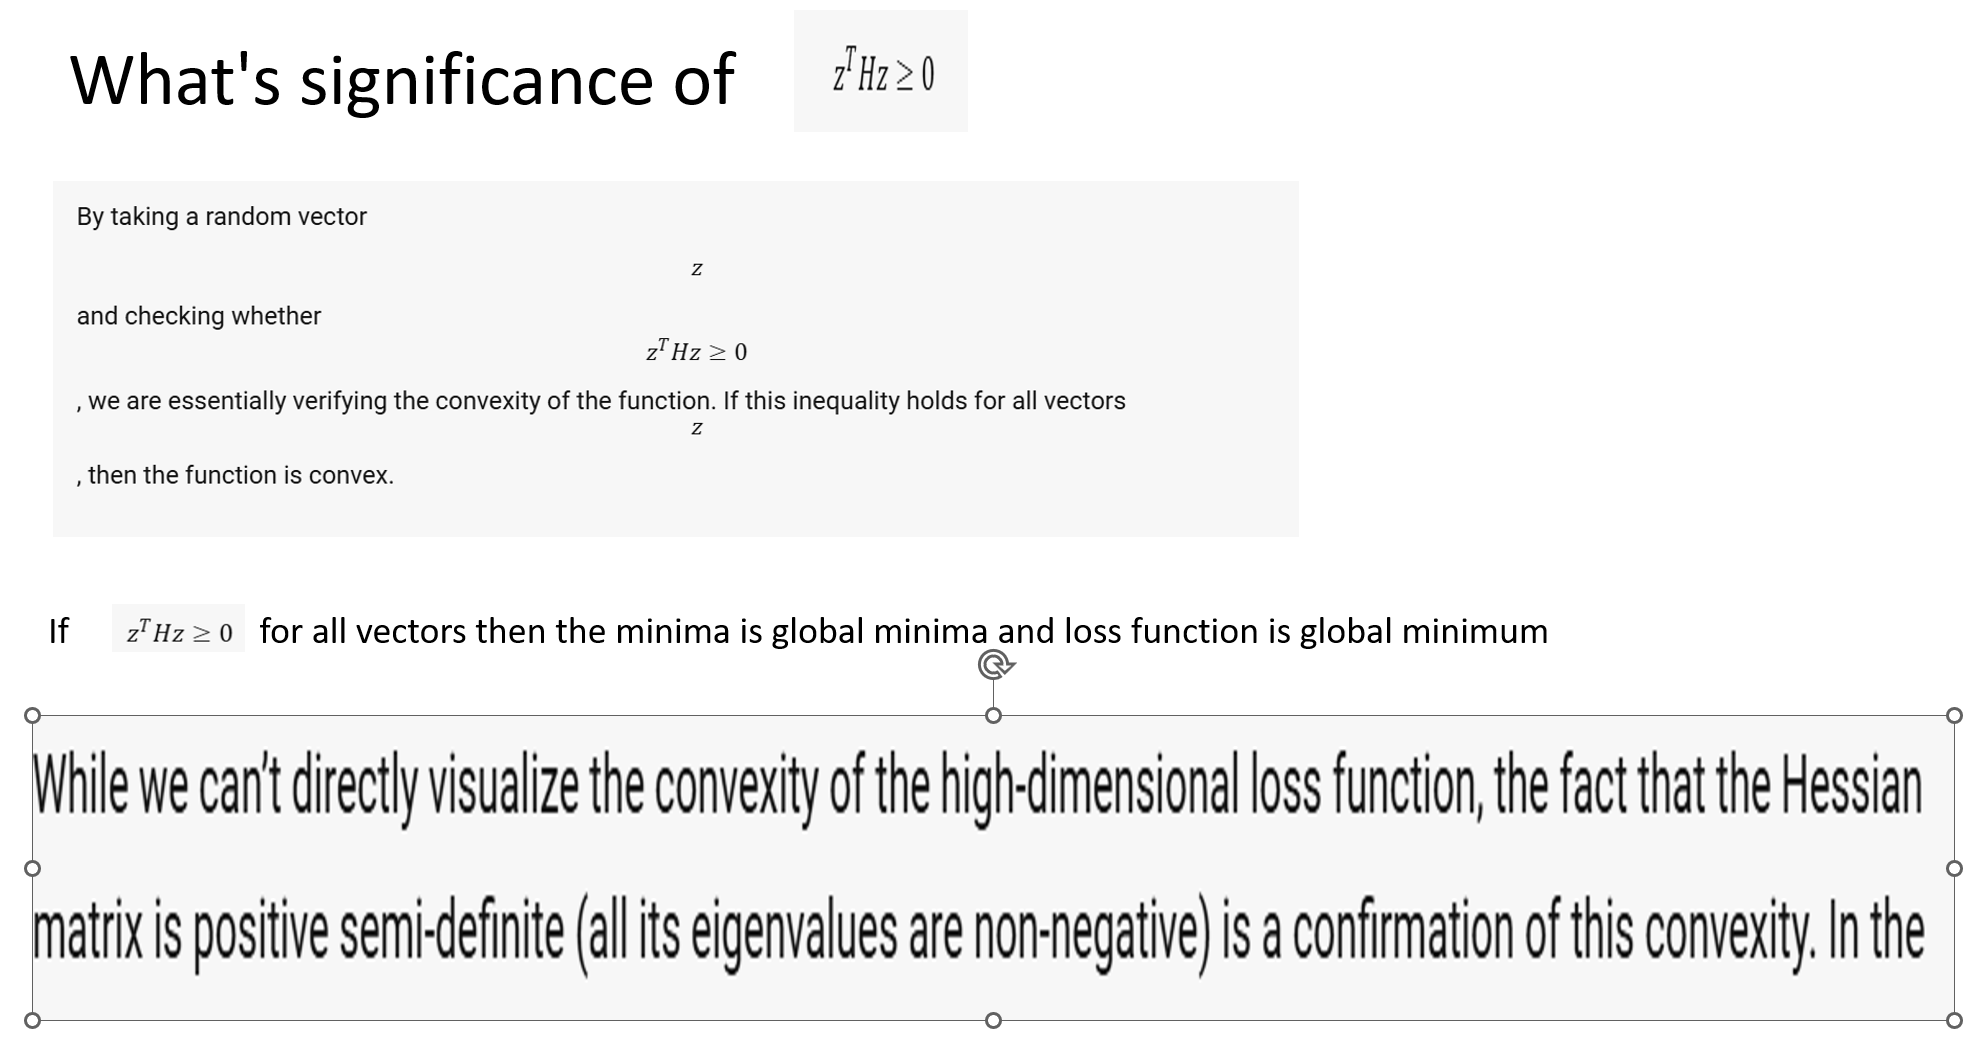**bold text**

In [7]:
import numpy as np
import plotly.graph_objects as go
import numpy.linalg as la
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Load the breast cancer dataset
data = datasets.load_breast_cancer()
X = data['data']    # Features
y = data['target']  # Target

# Train the logistic regression model using sklearn
model = LogisticRegression(max_iter=50000)
model.fit(X, y)

# Get the predictions
predictions = model.predict_proba(X)[:, 1]

## The following below is another way to calculate the Hessian ..Rather than taking firstd erivatibe
def compute_hessian(X, predictions):
    # Compute the diagonal matrix D
    D = np.diag(predictions * (1 - predictions))

    # Compute the Hessian
    H = np.dot(np.dot(X.T, D), X)

    return H

# Compute the Hessian
H = compute_hessian(X, predictions)

# Verify positive semi-definiteness by checking z^THz >= 0 for some random vectors z
z_values = []
results = []
for _ in range(10):
    z = np.random.rand(H.shape[0])
    result = np.dot(z.T, np.dot(H, z))
    z_values.append(z)
    results.append(result)
    print(f"z^THz = {result}")


# Create a scatter plot of z^THz for different vectors z
fig = go.Figure(data=go.Scatter(x=list(range(10)), y=results, mode='markers'))
fig.update_layout(title='z^THz for different vectors z', xaxis_title='Vector z', yaxis_title='z^THz')
fig.show()

z^THz = 11371140.32525108
z^THz = 11022290.796918822
z^THz = 5580386.687953824
z^THz = 37055650.15378686
z^THz = 15293470.486470902
z^THz = 23535893.942883436
z^THz = 12763068.47064931
z^THz = 9532235.784550587
z^THz = 6470707.721771306
z^THz = 26255242.537030324
